In [3]:
import numpy as np
import pandas as pd

# set pandas to view all columns
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [4]:
data = pd.read_csv('./dataset/loan_data_2007_2014.csv', low_memory = False)
data.drop(columns='Unnamed: 0', inplace=True)
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

# Check Duplicated Values

In [6]:
data.duplicated().sum()

0

no duplications

# Define Columns Target

In [7]:
data.loan_status.value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [8]:
data = data[data.loan_status != 'Current']
data = data[data.loan_status != 'In Grace Period']

In [9]:
bad_loan = [
    'Charged Off',
    'Late (31-120 days)',
    'Late (16-30 days)',
    'Does not meet the credit policy. Status:Charged Off',
    'Default'
]

data['target'] = np.where(data['loan_status'].isin(bad_loan), 1, 0)

In [10]:
100*data.target.value_counts(normalize=True)

target
0    78.156902
1    21.843098
Name: proportion, dtype: float64

In [11]:
len(data)

238913

In [12]:
# save data for future used
data.to_csv('./dataset/final_loan_data.csv')

# Finding Problems

In [13]:
data['profit'] = data['total_pymnt'] - data['funded_amnt']

loan_performance = data[['loan_amnt','funded_amnt','total_pymnt','profit','loan_status','target']].groupby(by='loan_status').sum()
loan_performance['percent_profit'] = 100*loan_performance['profit'] / loan_performance['funded_amnt']
loan_performance.sort_values('percent_profit', ascending=False)

,loan_amnt,funded_amnt,total_pymnt,profit,target,percent_profit
loan_status,,,,,,
Does not meet the credit policy. Status:Fully Paid,17600225,17254600,2.094598e+07,3.691385e+06,0,21.393627
Fully Paid,2441213975,2433010425,2.809857e+09,3.768461e+08,0,15.488882
Late (16-30 days),19245350,19245350,1.218562e+07,-7.059731e+06,1218,-36.682789
Late (31-120 days),107320925,107292450,6.147801e+07,-4.581444e+07,6900,-42.700524
Does not meet the credit policy. Status:Charged Off,7250225,7037825,3.655629e+06,-3.382196e+06,761,-48.057403
Default,12717025,12717025,6.474769e+06,-6.242256e+06,832,-49.085822
Charged Off,616684275,614623500,2.827704e+08,-3.318531e+08,42475,-53.992901


In [14]:
loan_performance = data[['loan_amnt','funded_amnt','total_pymnt','profit','loan_status','target']].groupby(by='loan_status').mean()
loan_performance['percent_profit'] = 100*loan_performance['profit'] / loan_performance['funded_amnt']
loan_performance.sort_values('percent_profit', ascending=False)

,loan_amnt,funded_amnt,total_pymnt,profit,target,percent_profit
loan_status,,,,,,
Does not meet the credit policy. Status:Fully Paid,8853.231891,8679.376258,10536.209666,1856.833409,0.0,21.393627
Fully Paid,13214.394226,13169.988064,15209.872007,2039.883942,0.0,15.488882
Late (16-30 days),15800.779967,15800.779967,10004.613251,-5796.166716,1.0,-36.682789
Late (31-120 days),15553.757246,15549.630435,8909.856771,-6639.773664,1.0,-42.700524
Does not meet the credit policy. Status:Charged Off,9527.233903,9248.127464,4803.717553,-4444.409911,1.0,-48.057403
Default,15284.885817,15284.885817,7782.173918,-7502.711900,1.0,-49.085822
Charged Off,14518.758682,14470.241318,6657.338290,-7812.903028,1.0,-53.992901


In [15]:
loan_performance = data[['loan_amnt','funded_amnt','total_pymnt','profit','target']].groupby(by='target').mean()
loan_performance['percent_profit'] = 100*loan_performance['profit'] / loan_performance['funded_amnt']
loan_performance.sort_values('percent_profit', ascending=False)

,loan_amnt,funded_amnt,total_pymnt,profit,percent_profit
target,,,,,
0,13167.962855,13122.178501,15160.113585,2037.935084,15.530463
1,14624.953053,14580.848312,7024.191781,-7556.656531,-51.825905


In [16]:
total_profit = data['profit'].sum()

print(f"Total Profit Earned from Loans: $  {total_profit :,.2f}")

Total Profit Earned from Loans: $  -13,814,173.25


# Handling Missing Values

In [17]:
# check for null values
# create custom funtion for checking null values
def check_null(df, ascending = False, return_all = False):
    # create series of null columns and null qty
    series = df.isnull().sum()

    # take only columns that has null values
    if return_all == False:
        series = series[series > 0]

    # calculate percent
    percent = np.round(100 * series / df.shape[0], 2)

    # check dtype
    coldtype = df[series.index].dtypes

    # create dataframe
    result = pd.DataFrame({
        'QTY' : series, 'Percent' : percent, 'dtypes' : coldtype
    })
    result.index.name = 'Column'

    if ascending != None:
        result.sort_values(by = 'QTY', ascending = ascending, inplace = True)

    result.reset_index(inplace = True)
    
    return result

In [18]:
column_full_NaN = data.isna().sum()[data.isna().sum() == len(data)].index.to_list()
data.drop(columns = column_full_NaN, inplace=True)

check_null(data)

,Column,QTY,Percent,dtypes
0,next_pymnt_d,227214,95.10,object
1,mths_since_last_record,209964,87.88,float64
2,mths_since_last_major_derog,196369,82.19,float64
3,desc,146771,61.43,object
4,mths_since_last_delinq,133528,55.89,float64
5,total_rev_hi_lim,66623,27.89,float64
6,tot_cur_bal,66623,27.89,float64
7,tot_coll_amt,66623,27.89,float64
8,emp_title,13478,5.64,object
9,emp_length,9225,3.86,object


In [19]:
# remove columns with high missing values
col_high_NaN = ['mths_since_last_record', 'mths_since_last_major_derog', 'desc', 'mths_since_last_delinq', 'next_pymnt_d']

data.drop(columns = col_high_NaN, inplace=True)

In [20]:
data.revol_util.describe()

count    238681.000000
mean         54.995834
std          24.671291
min           0.000000
25%          37.300000
50%          56.700000
75%          74.500000
max         892.300000
Name: revol_util, dtype: float64

In [21]:
data.loc[data['revol_util'].isna(),'revol_util'] = data.revol_util.median()

In [22]:
# filling missing 'total_rev_hi_lim'
data.loc[data['total_rev_hi_lim'].isna(),'total_rev_hi_lim'] = data.loc[data['total_rev_hi_lim'].isna(), 'revol_util'] * data.loc[data['total_rev_hi_lim'].isna(), 'revol_bal']

In [23]:
check_null(data)

,Column,QTY,Percent,dtypes
0,tot_coll_amt,66623,27.89,float64
1,tot_cur_bal,66623,27.89,float64
2,emp_title,13478,5.64,object
3,emp_length,9225,3.86,object
4,last_pymnt_d,376,0.16,object
5,collections_12_mths_ex_med,145,0.06,float64
6,delinq_2yrs,29,0.01,float64
7,earliest_cr_line,29,0.01,object
8,inq_last_6mths,29,0.01,float64
9,open_acc,29,0.01,float64


# Removing Irrelevant Columns

In [24]:
removed_cols = [
    # unique id, tho we will keep member_id for goods
    'id',

    # free text
    'url',

    # others: related to reference time then we left it
    'last_credit_pull_d',
    'last_pymnt_d',

    # data leakage
    'loan_status',
    'collection_recovery_fee',
    'out_prncp',
    'out_prncp_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'last_pymnt_amnt',
    'issue_d',
    'total_pymnt',
    'total_pymnt_inv',
    'recoveries',
    'collection_recovery_fee',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'last_credit_pull_d'
]

data.drop(columns=removed_cols, inplace=True)

# Date Handling and Manual Encoding

### earliest_cr_line

In [25]:
# due to low number of NaN values and for supporting calculations, NaN values need to be filled
# for that we need to fill it with mode
data.earliest_cr_line.fillna(data.earliest_cr_line.mode()[0], inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2844\3785391797.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.earliest_cr_line.fillna(data.earliest_cr_line.mode()[0], inplace=True)


In [26]:
sorted(data.earliest_cr_line.str.split('-').apply(lambda x: x[-1]).unique())

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '46',
 '48',
 '50',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99']

because the data given is data from 2011-2014, of course values above 17, indicates that the data is from 19th century. so we need a bit processings on this

In [27]:
# seperate month and year
month = data.earliest_cr_line.str.split('-').apply(lambda x: x[0])
year = data.earliest_cr_line.str.split('-').apply(lambda x: x[-1]).astype(int)

# fixing year
year = year.apply(lambda x: 1900+x if x > 17 else 2000+x).astype('str')

# combine
data.earliest_cr_line = month+'-'+year

In [28]:
data.earliest_cr_line.unique()

array(['Jan-1985', 'Apr-1999', 'Nov-2001', 'Feb-1996', 'Nov-2004',
       'Jan-2007', 'Apr-2004', 'Sep-2004', 'Jan-1998', 'Oct-1989',
       'Jul-2003', 'May-1991', 'Sep-2007', 'Oct-1998', 'Aug-1993',
       'Oct-2003', 'Jan-2001', 'Nov-1997', 'Feb-1983', 'Jul-1985',
       'Apr-2003', 'Jun-2001', 'Feb-2002', 'Aug-1984', 'Nov-2006',
       'Dec-1987', 'Nov-1981', 'Apr-2005', 'Oct-2007', 'Jul-2005',
       'Dec-2000', 'Apr-2007', 'Jan-2003', 'Mar-1994', 'Sep-1998',
       'Jun-2004', 'Nov-1995', 'Jul-1999', 'Jun-1995', 'Sep-1992',
       'Jan-2002', 'Apr-1992', 'Oct-2006', 'May-2000', 'Dec-1998',
       'Dec-2004', 'Oct-2000', 'May-2002', 'Jul-2002', 'Jul-2006',
       'May-1997', 'Oct-2005', 'Apr-1995', 'Oct-2002', 'Jan-2000',
       'Apr-2000', 'Dec-1994', 'Sep-2005', 'Dec-1984', 'Dec-1999',
       'Nov-2003', 'Jun-1989', 'Jun-2003', 'Oct-1996', 'May-2003',
       'Jun-2002', 'Jun-2007', 'Dec-1996', 'Sep-2002', 'Jan-1986',
       'May-1998', 'Jan-1997', 'Jun-2005', 'Feb-1990', 'Mar-20

In [29]:
ref_d = pd.to_datetime('2017-12-01')

data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%Y')

data['mths_earliest_cr_line'] = round( (data['earliest_cr_line'] - ref_d) / np.timedelta64(30, 'D'))

data['mths_earliest_cr_line'] = data['mths_earliest_cr_line'].astype('int', errors = 'ignore')

data.drop(columns = 'earliest_cr_line', inplace=True)

In [30]:
data.mths_earliest_cr_line.describe()

count    238913.000000
mean       -242.793088
std          84.766636
min        -876.000000
25%        -284.000000
50%        -226.000000
75%        -186.000000
max         -74.000000
Name: mths_earliest_cr_line, dtype: float64

### term

In [31]:
data['term'].value_counts()

term
36 months    186469
60 months     52444
Name: count, dtype: int64

In [32]:
data['term'] = data['term'].str.strip()
data['term'] = data['term'].str.replace(' months', '').astype(int)

### grade

In [33]:
grade_map = dict()
for v, k in enumerate(np.sort(data.grade.unique())):
    grade_map[f'{k}'] = v+1

In [34]:
grade_map

{'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}

In [35]:
data.grade = data.grade.map(grade_map)

### sub_grade

In [36]:
sub_grade_map = dict()
for i in np.sort(data.sub_grade.unique()):
    d = 0.199*int(i[1])
    n = grade_map[f'{i[0]}']
    code = n+d

    sub_grade_map[f'{i}'] = code

In [37]:
sub_grade_map

{'A1': 1.199,
 'A2': 1.3980000000000001,
 'A3': 1.597,
 'A4': 1.796,
 'A5': 1.995,
 'B1': 2.199,
 'B2': 2.398,
 'B3': 2.597,
 'B4': 2.7960000000000003,
 'B5': 2.995,
 'C1': 3.199,
 'C2': 3.398,
 'C3': 3.597,
 'C4': 3.7960000000000003,
 'C5': 3.995,
 'D1': 4.199,
 'D2': 4.398,
 'D3': 4.5969999999999995,
 'D4': 4.796,
 'D5': 4.995,
 'E1': 5.199,
 'E2': 5.398,
 'E3': 5.5969999999999995,
 'E4': 5.796,
 'E5': 5.995,
 'F1': 6.199,
 'F2': 6.398,
 'F3': 6.5969999999999995,
 'F4': 6.796,
 'F5': 6.995,
 'G1': 7.199,
 'G2': 7.398,
 'G3': 7.5969999999999995,
 'G4': 7.796,
 'G5': 7.995}

In [38]:
data.sub_grade = data.sub_grade.map(sub_grade_map)

# Check Cardinality

In [39]:
data.select_dtypes(include='O').nunique().sort_values(ascending=False)

emp_title              129889
title                   49929
zip_code                  875
addr_state                 50
purpose                    14
emp_length                 11
home_ownership              6
verification_status         3
pymnt_plan                  2
initial_list_status         2
application_type            1
dtype: int64

There is a huge numbers of unique category given in 'emp_title', 'title', 'zip_code', 'addr_state', and 'sub_grade'.
we first will remove 'emp_title', and 'zip_code' since 'emp_title' has super huge distint category and 'zip_code' is, hopefully, can be representated by 'addr_state'. for 'application_type' cz its just has 1 unique value, we will discard it

In [40]:
data.drop(columns=['emp_title', 'title', 'zip_code', 'application_type'], inplace=True)

# Check Category Consistency

### addr_state

In [41]:
def check_value_compositions(data, col):
    val_cons = data[col].value_counts()
    val_comp = data[col].value_counts(normalize=True)
    ratio = val_comp*len(data[col].unique())

    df = pd.DataFrame({
        'N' : val_cons,
        'Perc' : 100*val_comp,
        'R' : ratio
        
    }, index = val_cons.index)

    return df

check_value_compositions(data, 'addr_state')

,N,Perc,R
addr_state,,,
CA,40550,16.972706,8.486353
NY,20608,8.625734,4.312867
TX,18161,7.601512,3.800756
FL,16647,6.967808,3.483904
NJ,9243,3.868772,1.934386
IL,8806,3.685861,1.842930
PA,8071,3.378217,1.689109
GA,7574,3.170192,1.585096
VA,7549,3.159728,1.579864


### sub_grade

In [42]:
check_value_compositions(data, 'sub_grade')

,N,Perc,R
sub_grade,,,
2.597,17375,7.272522,2.545383
2.796,16126,6.749737,2.362408
3.199,14012,5.864896,2.052714
2.398,13927,5.829319,2.040262
2.995,13414,5.614596,1.965109
3.398,13377,5.599109,1.959688
3.597,11923,4.990520,1.746682
2.199,11397,4.770356,1.669625
3.796,11232,4.701293,1.645453


### purpose

In [43]:
check_value_compositions(data, 'purpose')

,N,Perc,R
purpose,,,
debt_consolidation,139085,58.215752,8.150205
credit_card,47640,19.940313,2.791644
home_improvement,13891,5.814250,0.813995
other,13705,5.736398,0.803096
major_purchase,5974,2.500492,0.350069
small_business,4799,2.008681,0.281215
car,3505,1.467061,0.205389
medical,2714,1.135978,0.159037
wedding,2017,0.844240,0.118194


### emp_length

In [44]:
check_value_compositions(data, 'emp_length')

,N,Perc,R
emp_length,,,
10+ years,71312,31.047334,3.725680
2 years,22352,9.731462,1.167775
< 1 year,19998,8.706593,1.044791
3 years,19395,8.444063,1.013288
5 years,17297,7.530650,0.903678
1 year,16078,6.999930,0.839992
4 years,15402,6.705618,0.804674
6 years,14300,6.225837,0.747100
7 years,13466,5.862736,0.703528


### home_ownership

In [45]:
check_value_compositions(data, 'home_ownership')

,N,Perc,R
home_ownership,,,
MORTGAGE,117376,49.129181,2.947751
RENT,101186,42.352656,2.541159
OWN,20123,8.422731,0.505364
OTHER,179,0.074923,0.004495
NONE,48,0.020091,0.001205
ANY,1,0.000419,0.000025


### verification_status

In [46]:
check_value_compositions(data, 'verification_status')

,N,Perc,R
verification_status,,,
Verified,88823,37.177969,1.115339
Not Verified,83019,34.748632,1.042459
Source Verified,67071,28.073399,0.842202


### pymnt_plan

In [47]:
check_value_compositions(data, 'pymnt_plan')

,N,Perc,R
pymnt_plan,,,
n,238906,99.99707,1.999941
y,7,0.00293,0.000059


### initial_list_status

In [48]:
check_value_compositions(data, 'initial_list_status')

,N,Perc,R
initial_list_status,,,
f,177714,74.384399,1.487688
w,61199,25.615601,0.512312


due to imbalaced feature and redundacy, we can discard: 'pymnt_plan'

In [49]:
data.drop(columns='pymnt_plan', inplace=True)

# Check Numerical Data Consistency

In [50]:
int_cols = [
    'delinq_2yrs', 
    'inq_last_6mths', 
    'open_acc', 
    'pub_rec', 
    'total_acc', 
    'collections_12_mths_ex_med',
    'acc_now_delinq',
    'mths_earliest_cr_line'
]

In [51]:
data['loan_amnt'] = data['loan_amnt'].astype('float')
data['funded_amnt'] = data['funded_amnt'].astype('float')

In [52]:
for col in int_cols:
    data[col] = pd.array(data[col].to_numpy(), dtype=pd.Int64Dtype())

In [53]:
data.select_dtypes(include=['float']).describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,238913.0,13486.214647,8066.725464,500.000,7200.000,12000.000000,18000.00000,3.500000e+04
funded_amnt,238913.0,13440.797173,8042.190169,500.000,7200.000,12000.000000,18000.00000,3.500000e+04
funded_amnt_inv,238913.0,13312.662461,8080.099456,0.000,7125.000,11914.311470,18000.00000,3.500000e+04
int_rate,238913.0,13.855453,4.380770,5.420,10.990,13.670000,16.59000,2.606000e+01
installment,238913.0,416.935049,243.750417,15.670,239.410,365.230000,545.96000,1.408130e+03
sub_grade,238913.0,3.398871,1.326973,1.199,2.398,3.199000,4.19900,7.995000e+00
annual_inc,238909.0,71928.661725,55104.204330,1896.000,45000.000,61450.000000,86000.00000,7.141778e+06
dti,238913.0,16.439675,7.698582,0.000,10.720,16.140000,21.88000,3.999000e+01
revol_util,238913.0,54.997489,24.659366,0.000,37.300,56.700000,74.50000,8.923000e+02
tot_coll_amt,172290.0,200.963654,22110.090058,0.000,0.000,0.000000,0.00000,9.152545e+06


In [54]:
data.select_dtypes(include=['int']).describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,238913.0,9703610.744162,10078877.135583,70473.0,1616779.0,6479428.0,14457393.0,40616878.0
term,238913.0,41.268261,9.933987,36.0,36.0,36.0,36.0,60.0
grade,238913.0,2.805887,1.341819,1.0,2.0,3.0,4.0,7.0
delinq_2yrs,238884.0,0.2483,0.735872,0.0,0.0,0.0,0.0,29.0
inq_last_6mths,238884.0,0.906859,1.173756,0.0,0.0,1.0,1.0,33.0
open_acc,238884.0,10.858325,4.827772,0.0,7.0,10.0,13.0,76.0
pub_rec,238884.0,0.134932,0.421437,0.0,0.0,0.0,0.0,11.0
revol_bal,238913.0,15223.161335,19194.436646,0.0,5913.0,10988.0,19067.0,1746716.0
total_acc,238884.0,24.812034,11.664663,1.0,16.0,23.0,32.0,150.0
collections_12_mths_ex_med,238768.0,0.005939,0.083821,0.0,0.0,0.0,0.0,6.0


it seems that `policy_code` has only one values. we need to remove it

In [55]:
# drop policy code
data.drop(columns='policy_code', inplace=True)

# Exploratory Data Analysis

## Numerical Analysis

### Correlation

<Axes: >

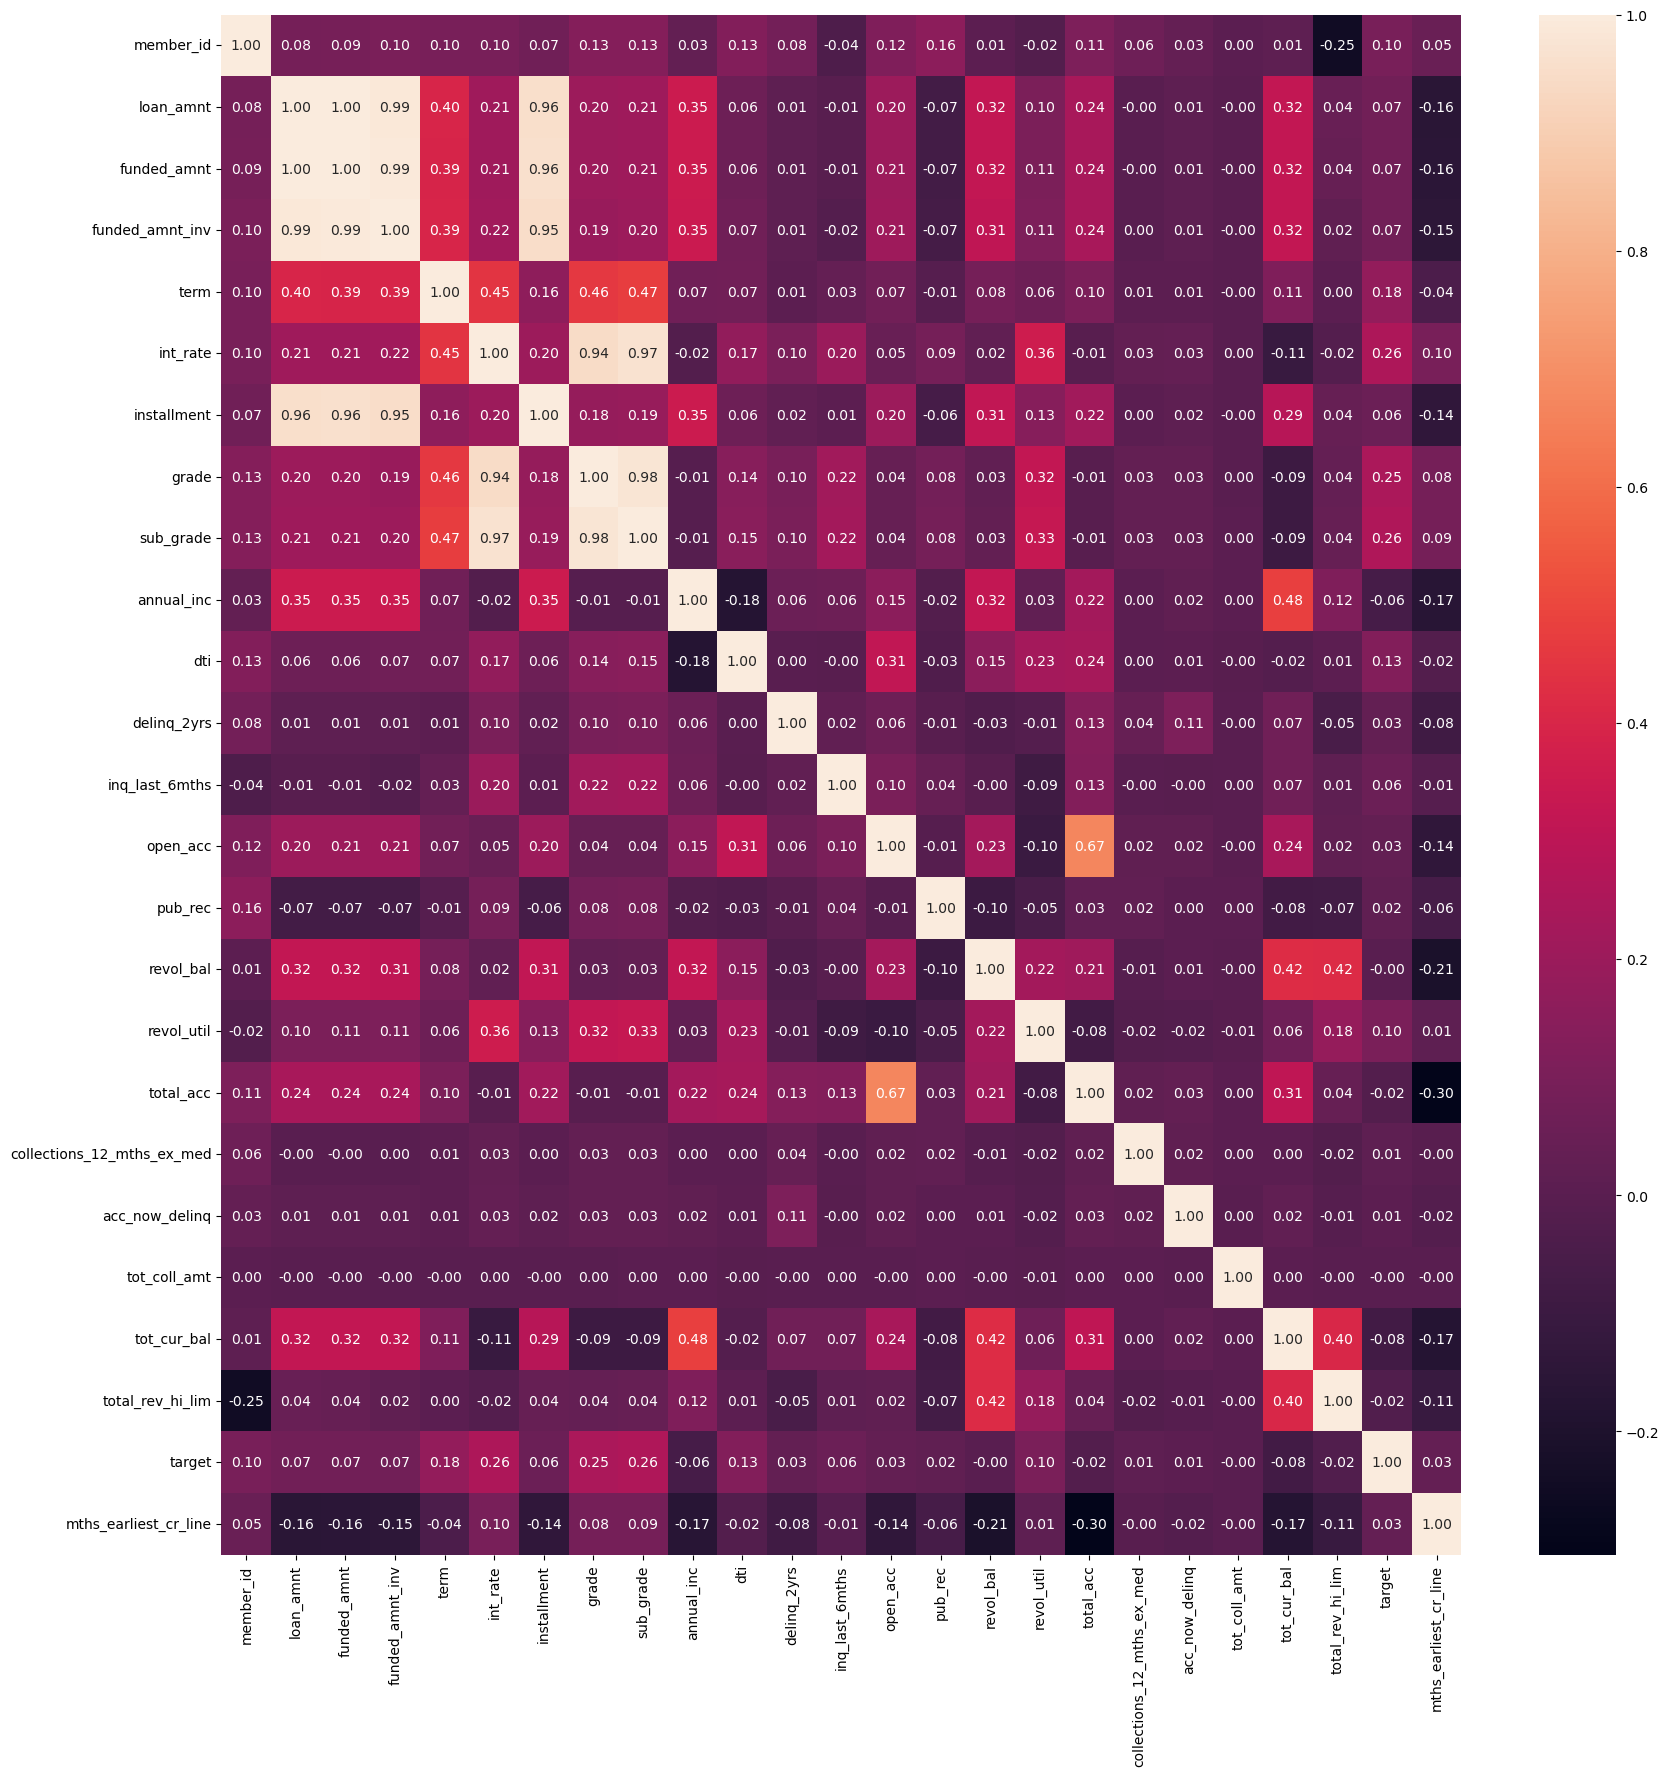

In [54]:
plt.figure(figsize=(20,20))
sns.heatmap(data.select_dtypes(['int', 'float']).corr(), annot = True, fmt = '.2f')

In [55]:
# Calculate the correlation matrix
corr_matrix = data.select_dtypes(['int', 'float']).corr()

# Set a threshold for high correlation
threshold = 0.7

# Extract the upper triangle of the correlation matrix to avoid duplicates
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find column pairs with correlation above the threshold
high_corr_pairs = [(col, row, f'{upper_triangle.loc[row, col] :.2f}') for col in upper_triangle.columns for row in upper_triangle.index 
                   if not pd.isna(upper_triangle.loc[row, col]) and abs(upper_triangle.loc[row, col]) > threshold]

print("Highly correlated column pairs:")
for pair in high_corr_pairs:
    print(pair)

Highly correlated column pairs:
('funded_amnt', 'loan_amnt', '1.00')
('funded_amnt_inv', 'loan_amnt', '0.99')
('funded_amnt_inv', 'funded_amnt', '0.99')
('installment', 'loan_amnt', '0.96')
('installment', 'funded_amnt', '0.96')
('installment', 'funded_amnt_inv', '0.95')
('grade', 'int_rate', '0.94')
('sub_grade', 'int_rate', '0.97')
('sub_grade', 'grade', '0.98')


In [56]:
high_corr_cols_drop = [
    'funded_amnt',
    'funded_amnt_inv',
    'installment',
    'sub_grade',
    'grade'
]

In [57]:
data.drop(columns=high_corr_cols_drop, inplace=True)

### Data Distributions

[]

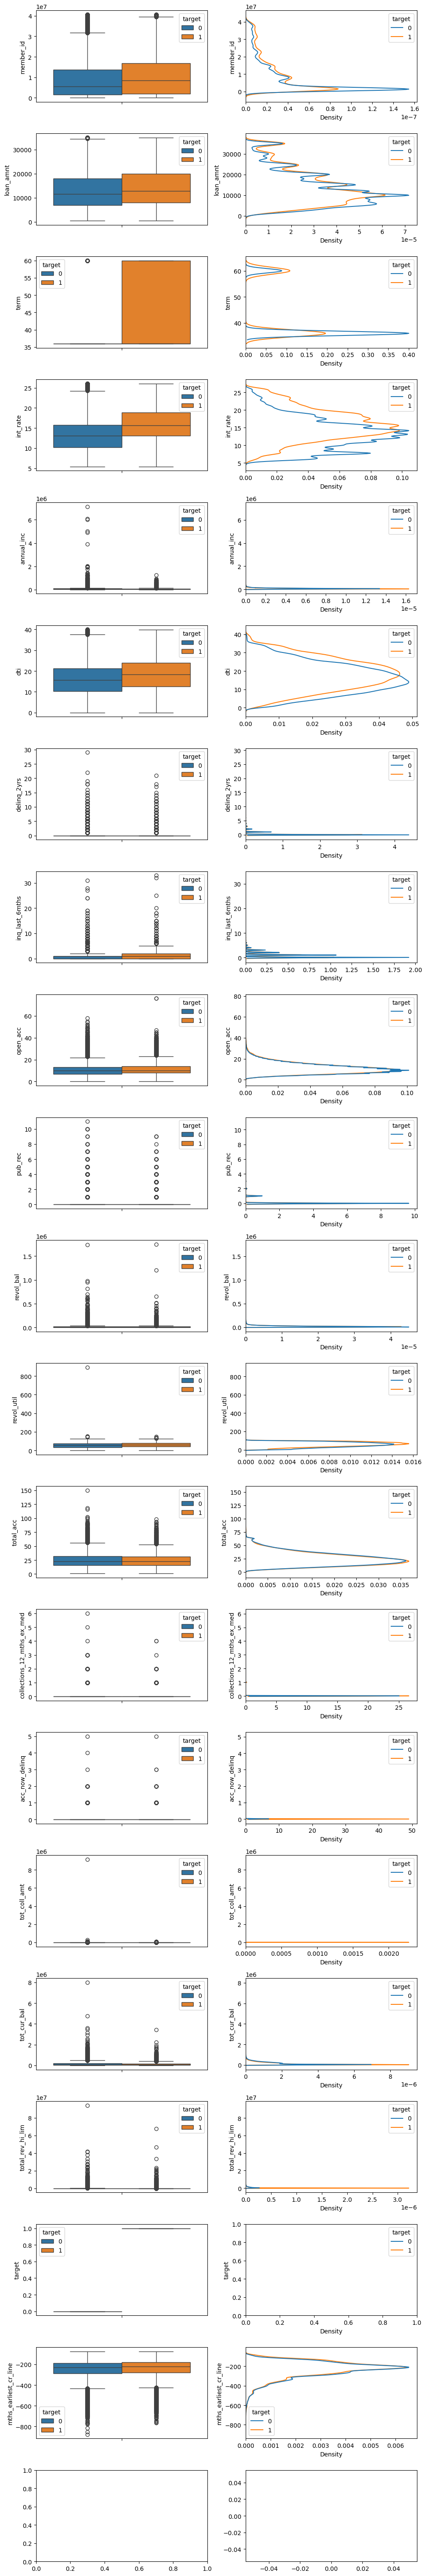

In [58]:
fig, ax = plt.subplots(21, 2, figsize=(10, 60))

num_cols = data.select_dtypes(['int', 'float']).columns.to_list()

for i, col in enumerate(num_cols):
    sns.boxplot(data, y = col, ax=ax[i,0], hue='target')
    sns.kdeplot(data, y = col, ax=ax[i,1], hue='target', common_norm=False, warn_singular=False)

plt.tight_layout()
plt.plot()

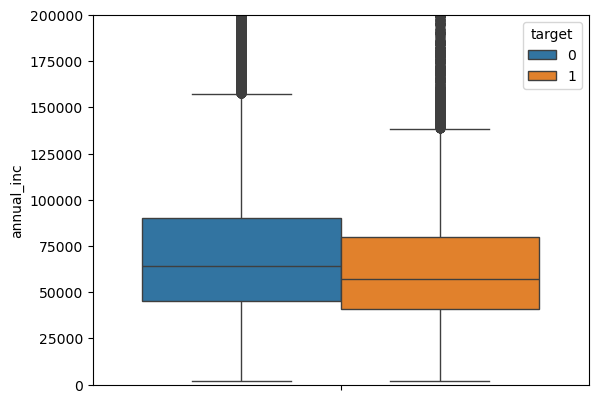

In [59]:
fig, ax = plt.subplots()
sns.boxplot(data, y='annual_inc', hue='target')
ax.set_ylim(0, 2e+5)
plt.show()

need inspect: 'tot_coll_amt', 'acc_now_delinq', 'collections_12_mths_ex_med', 'collection_recovery_fee', 'total_rec_late_fee', 'delinq_2yrs' which has many outliers

##

## Check Outliers

In [58]:
def detect_outliers(df, columns, iqr_multiplier=1.5):
    df = df.copy()
    outlier_flags = []

    for col in columns:
        # Calculate Q1, Q3, and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR
        
        # Flag outliers for the current column
        df[f"{col}_Outlier"] = ~df[col].between(lower_bound, upper_bound)
        outlier_flags.append(f"{col}_Outlier")

    # Combine all outlier flags to a single column
    df['Outlier'] = df[outlier_flags].any(axis=1)

    return df

num_cols = data.select_dtypes(['int', 'float']).columns

outliers_df = detect_outliers(data[num_cols], num_cols)
outliers_df = pd.concat([outliers_df, data.target], axis=1)

n_rows_outliers_list = []
col_names = []

for col in num_cols:  
    n_rows_outliers =  len(outliers_df.loc[outliers_df[f'{col}_Outlier'] == True, col])
    if n_rows_outliers > 0:
        n_rows_outliers_list.append(n_rows_outliers)
        col_names.append(col)


res = pd.DataFrame({
    'column_name' : col_names,
    'n_rows_outliers' : n_rows_outliers_list
})
res['percent_outliers'] = 100*res['n_rows_outliers']/len(data)
res.sort_values(by='percent_outliers', ascending=False)

,column_name,n_rows_outliers,percent_outliers
15,tot_coll_amt,86015,36.002645
16,tot_cur_bal,71913,30.100078
19,profit,54198,22.685245
2,term,52444,21.951087
18,target,52186,21.843098
17,total_rev_hi_lim,48716,20.390686
6,delinq_2yrs,38306,16.033452
9,pub_rec,27674,11.583296
7,inq_last_6mths,22909,9.588846
10,revol_bal,12221,5.115251


## Cetegorical Analysis

In [59]:
cat_cols = data.select_dtypes('O').columns.to_list()

In [60]:
def analyze_categorical(df, 
                        cat_col=None,
                        val_col = 'member_id',
                        target='target',
                        agg_func = 'count'):

    pvt = pd.pivot_table(data,
                         index = cat_col,
                         columns = target,
                         values = val_col,
                         aggfunc = agg_func)

    pvt.columns = ['not_delinq', 'delinq']

    pvt['total_rows'] = pvt['not_delinq']+pvt['delinq']

    pvt['percent_delinq'] = 100 * pvt['delinq']/pvt['total_rows']

    pvt['rows_contribution'] = 100 * pvt['total_rows'] / len(df)

    pvt = pvt.sort_values(by='rows_contribution', ascending=False)

    display(pvt)

In [61]:
analyze_categorical(data, 'emp_length')

,not_delinq,delinq,total_rows,percent_delinq,rows_contribution
emp_length,,,,,
10+ years,55987,15325,71312,21.490072,29.848522
2 years,17705,4647,22352,20.790086,9.355707
< 1 year,15571,4427,19998,22.137214,8.370411
3 years,15287,4108,19395,21.180717,8.118018
5 years,13686,3611,17297,20.876453,7.239874
1 year,12692,3386,16078,21.059833,6.729646
4 years,12251,3151,15402,20.458382,6.446698
6 years,11184,3116,14300,21.790210,5.985442
7 years,10487,2979,13466,22.122382,5.636361


In [62]:
analyze_categorical(data, 'home_ownership')

,not_delinq,delinq,total_rows,percent_delinq,rows_contribution
home_ownership,,,,,
MORTGAGE,94129.0,23247.0,117376.0,19.805582,49.129181
RENT,76936.0,24250.0,101186.0,23.965766,42.352656
OWN,15480.0,4643.0,20123.0,23.073100,8.422731
OTHER,141.0,38.0,179.0,21.229050,0.074923
NONE,40.0,8.0,48.0,16.666667,0.020091
ANY,1.0,NaN,NaN,NaN,NaN


In [63]:
data.loc[(data.home_ownership == 'NONE') | (data.home_ownership == 'ANY'), 'home_ownership'] = 'OTHER'

In [64]:
analyze_categorical(data, 'home_ownership')

,not_delinq,delinq,total_rows,percent_delinq,rows_contribution
home_ownership,,,,,
MORTGAGE,94129,23247,117376,19.805582,49.129181
RENT,76936,24250,101186,23.965766,42.352656
OWN,15480,4643,20123,23.073100,8.422731
OTHER,182,46,228,20.175439,0.095432


In [65]:
analyze_categorical(data, 'verification_status')

,not_delinq,delinq,total_rows,percent_delinq,rows_contribution
verification_status,,,,,
Verified,66932,21891,88823,24.645644,37.177969
Not Verified,68814,14205,83019,17.110541,34.748632
Source Verified,50981,16090,67071,23.989504,28.073399


In [66]:
analyze_categorical(data, 'purpose')

,not_delinq,delinq,total_rows,percent_delinq,rows_contribution
purpose,,,,,
debt_consolidation,107249,31836,139085,22.889600,58.215752
credit_card,38440,9200,47640,19.311503,19.940313
home_improvement,11219,2672,13891,19.235476,5.814250
other,10366,3339,13705,24.363371,5.736398
major_purchase,5012,962,5974,16.103113,2.500492
small_business,3253,1546,4799,32.215045,2.008681
car,3017,488,3505,13.922967,1.467061
medical,2090,624,2714,22.991894,1.135978
wedding,1732,285,2017,14.129896,0.844240


In [67]:
grouping = ['renewable_energy', 'educational', 'vacation', 'house']
purpose_map = dict()

for i in data.purpose.unique():
    if i not in grouping:
        purpose_map[f'{i}'] = i
    else:
        purpose_map[f'{i}'] = 'other'

In [68]:
purpose_map

{'credit_card': 'credit_card',
 'car': 'car',
 'small_business': 'small_business',
 'other': 'other',
 'wedding': 'wedding',
 'debt_consolidation': 'debt_consolidation',
 'home_improvement': 'home_improvement',
 'major_purchase': 'major_purchase',
 'medical': 'medical',
 'moving': 'moving',
 'vacation': 'other',
 'house': 'other',
 'renewable_energy': 'other',
 'educational': 'other'}

In [69]:
data.purpose = data.purpose.map(purpose_map)

In [70]:
analyze_categorical(data, 'purpose')

,not_delinq,delinq,total_rows,percent_delinq,rows_contribution
purpose,,,,,
debt_consolidation,107249,31836,139085,22.889600,58.215752
credit_card,38440,9200,47640,19.311503,19.940313
other,13280,4108,17388,23.625489,7.277963
home_improvement,11219,2672,13891,19.235476,5.814250
major_purchase,5012,962,5974,16.103113,2.500492
small_business,3253,1546,4799,32.215045,2.008681
car,3017,488,3505,13.922967,1.467061
medical,2090,624,2714,22.991894,1.135978
wedding,1732,285,2017,14.129896,0.844240


In [71]:
analyze_categorical(data, 'addr_state')

,not_delinq,delinq,total_rows,percent_delinq,rows_contribution
addr_state,,,,,
CA,32269.0,8281.0,40550.0,20.421702,16.972706
NY,15784.0,4824.0,20608.0,23.408385,8.625734
TX,14572.0,3589.0,18161.0,19.762128,7.601512
FL,12603.0,4044.0,16647.0,24.292665,6.967808
NJ,7122.0,2121.0,9243.0,22.947095,3.868772
IL,7021.0,1785.0,8806.0,20.270270,3.685861
PA,6207.0,1864.0,8071.0,23.095032,3.378217
GA,5981.0,1593.0,7574.0,21.032480,3.170192
VA,5878.0,1671.0,7549.0,22.135382,3.159728


In [72]:
grouping = ['NE', 'IA', 'ID', 'ME', 'MS', 'VT']
addr_state_map = dict()

for i in data.addr_state.unique():
    if i not in grouping:
        addr_state_map[f'{i}'] = i
    else:
        addr_state_map[f'{i}'] = 'XX'

In [73]:
addr_state_map

{'AZ': 'AZ',
 'GA': 'GA',
 'IL': 'IL',
 'CA': 'CA',
 'TX': 'TX',
 'VA': 'VA',
 'MO': 'MO',
 'CT': 'CT',
 'UT': 'UT',
 'FL': 'FL',
 'NY': 'NY',
 'PA': 'PA',
 'MN': 'MN',
 'NJ': 'NJ',
 'OR': 'OR',
 'KY': 'KY',
 'OH': 'OH',
 'SC': 'SC',
 'RI': 'RI',
 'LA': 'LA',
 'MA': 'MA',
 'WA': 'WA',
 'WI': 'WI',
 'AL': 'AL',
 'NV': 'NV',
 'AK': 'AK',
 'CO': 'CO',
 'MD': 'MD',
 'WV': 'WV',
 'VT': 'XX',
 'MI': 'MI',
 'DC': 'DC',
 'SD': 'SD',
 'NC': 'NC',
 'AR': 'AR',
 'NM': 'NM',
 'KS': 'KS',
 'HI': 'HI',
 'OK': 'OK',
 'MT': 'MT',
 'WY': 'WY',
 'NH': 'NH',
 'DE': 'DE',
 'MS': 'XX',
 'TN': 'TN',
 'IA': 'XX',
 'NE': 'XX',
 'ID': 'XX',
 'IN': 'IN',
 'ME': 'XX'}

In [74]:
data.addr_state = data.addr_state.map(addr_state_map)

In [75]:
analyze_categorical(data, 'addr_state')

,not_delinq,delinq,total_rows,percent_delinq,rows_contribution
addr_state,,,,,
CA,32269,8281,40550,20.421702,16.972706
NY,15784,4824,20608,23.408385,8.625734
TX,14572,3589,18161,19.762128,7.601512
FL,12603,4044,16647,24.292665,6.967808
NJ,7122,2121,9243,22.947095,3.868772
IL,7021,1785,8806,20.270270,3.685861
PA,6207,1864,8071,23.095032,3.378217
GA,5981,1593,7574,21.032480,3.170192
VA,5878,1671,7549,22.135382,3.159728


In [76]:
analyze_categorical(data, 'initial_list_status')

,not_delinq,delinq,total_rows,percent_delinq,rows_contribution
initial_list_status,,,,,
f,140592,37122,177714,20.888619,74.384399
w,46135,15064,61199,24.614781,25.615601


## Delinquency Rate Analysis

In [77]:
import pandas as pd
import numpy as np

def calculate_delinquency_rate(data, x_feature, bins=10):
    """
    Calculate the delinquency rate within bins of a given feature.
    
    Parameters:
        data (pd.DataFrame): The dataframe containing the feature and target column.
        x_feature (str): The feature column to bin.
        bins (int or list): Number of bins or custom bin edges.
        
    Returns:
        pd.DataFrame: A dataframe with bins and corresponding delinquency rate.
    """
    
    # Create bins
    if isinstance(bins, int):
        bin_edges = np.unique(np.quantile(data[x_feature].dropna(), np.linspace(0, 1, bins + 1)))
    else:
        bin_edges = np.unique(bins)
    
    data['bin'] = pd.cut(data[x_feature], bins=bin_edges, labels=bin_edges[1:], duplicates='drop')
    
    # Calculate delinquency rate
    delinquency_rate = (data.groupby('bin')['target']
                        .agg(['count', 'sum'])
                        .rename(columns={'count': 'Total', 'sum': 'Bad Loan'}))
    
    delinquency_rate['Bad Loan Rate'] = 100*delinquency_rate['Bad Loan'] / delinquency_rate['Total']
    
    return delinquency_rate.reset_index()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2844\3535765025.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delinquency_rate = (data.groupby('bin')['target']


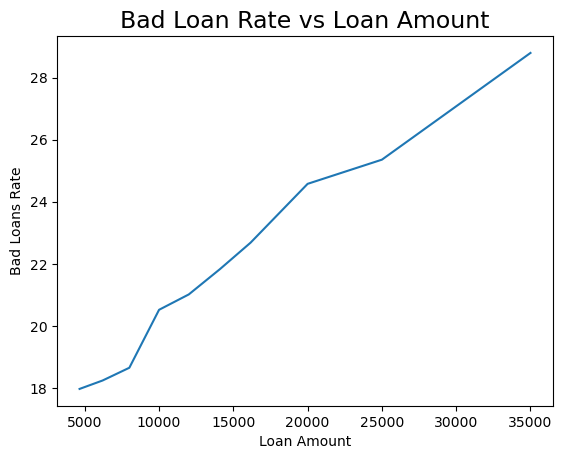

In [78]:
delinq_rate = calculate_delinquency_rate(data, 'loan_amnt', bins=10)
plt.plot(delinq_rate['bin'], delinq_rate['Bad Loan Rate'])
plt.title("Bad Loan Rate vs Loan Amount", size=17)
plt.xlabel("Loan Amount")
plt.ylabel("Bad Loans Rate")
plt.show();

In [108]:
delinq_rate

,bin,Total,Bad Loan,Bad Loan Rate
0,20.0,22147,2844,12.841468
1,32.5,24022,4116,17.134294
2,41.6,23840,4614,19.354027
3,49.4,23819,5024,21.092405
4,56.7,24299,5425,22.326022
5,63.6,23557,5441,23.097169
6,70.7,23927,5766,24.098299
7,78.3,23851,5941,24.908809
8,87.1,24005,6155,25.640492
9,892.3,23692,6558,27.680230


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2844\3535765025.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delinquency_rate = (data.groupby('bin')['target']


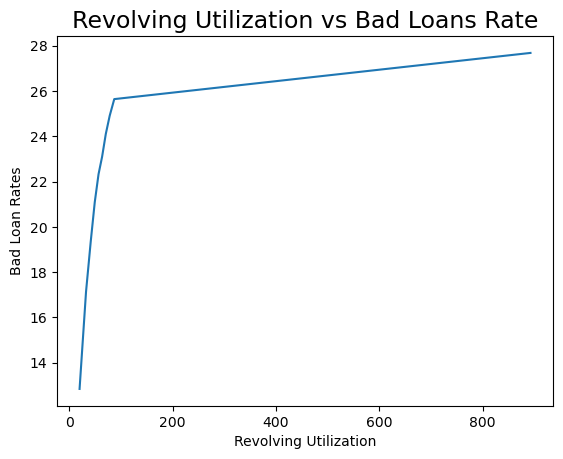

In [107]:
delinq_rate = calculate_delinquency_rate(data, 'revol_util', bins=10)
plt.plot(delinq_rate['bin'], delinq_rate['Bad Loan Rate'])
plt.title("Revolving Utilization vs Bad Loans Rate", size=17)
plt.xlabel("Revolving Utilization")
plt.ylabel("Bad Loan Rates")
plt.show();

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2844\3535765025.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delinquency_rate = (data.groupby('bin')['target']


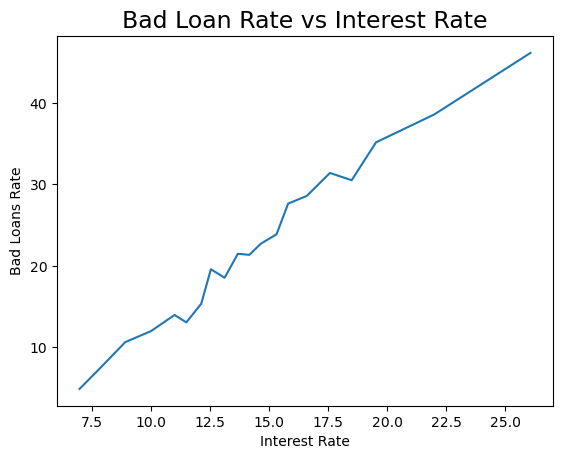

In [80]:
delinq_rate = calculate_delinquency_rate(data, 'int_rate', bins=20)
plt.plot(delinq_rate['bin'], delinq_rate['Bad Loan Rate'])
plt.title("Bad Loan Rate vs Interest Rate", size=17)
plt.xlabel("Interest Rate")
plt.ylabel("Bad Loans Rate")
plt.show();

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2844\3535765025.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delinquency_rate = (data.groupby('bin')['target']


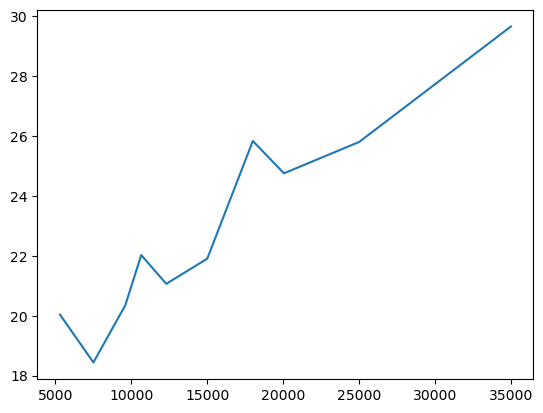

In [103]:
small_business_data = data[data.purpose == 'debt_consolidation'].copy()
delinq_rate_small_business = calculate_delinquency_rate(small_business_data, 'loan_amnt', bins=10)
plt.plot(delinq_rate_small_business['bin'], delinq_rate_small_business['Bad Loan Rate'])

In [94]:
from matplotlib.ticker import FuncFormatter

Text(0.5, 1.0, 'Profit Earned Per Loan Purposes')

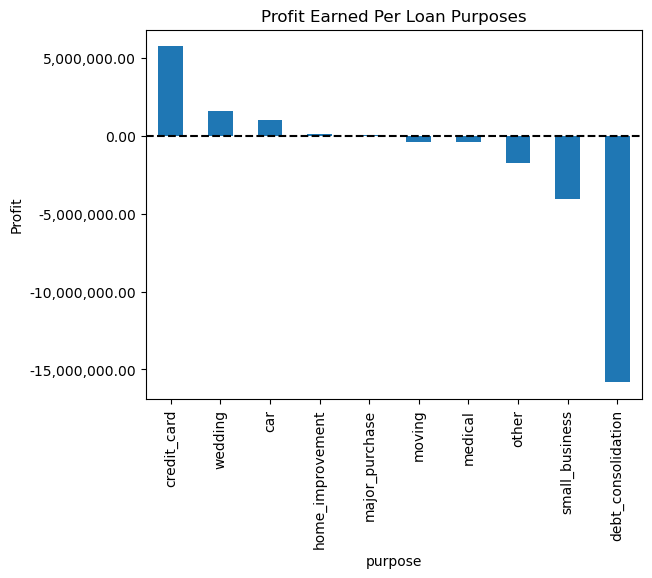

In [100]:
profit_by_purpose = data.groupby(by='purpose')['profit'].sum().sort_values(ascending=False)

profit_by_purpose.plot(kind='bar')
plt.axhline(0, color='k', linestyle='--')
plt.ylabel("Profit")
formatter = FuncFormatter(lambda x, _: f"{x:,.2f}")
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Profit Earned Per Loan Purposes")

# Fill Missing Values 

In [79]:
# filling with mode
data.loc[data['emp_length'].isna(), 'emp_length'] = data.emp_length.mode()[0]

# filling some values with 0
data.loc[data['collections_12_mths_ex_med'].isna(), 'collections_12_mths_ex_med'] = 0
data.loc[data['delinq_2yrs'].isna(), 'delinq_2yrs'] = 0
data.loc[data['inq_last_6mths'].isna(), 'inq_last_6mths'] = 0
data.loc[data['open_acc'].isna(), 'open_acc'] = 0
data.loc[data['pub_rec'].isna(), 'pub_rec'] = 0
data.loc[data['acc_now_delinq'].isna(), 'acc_now_delinq'] = 0
data.loc[data['tot_coll_amt'].isna(), 'tot_coll_amt'] = 0

# filling with median
data.loc[data['acc_now_delinq'].isna(), 'acc_now_delinq'] = data.acc_now_delinq.median()
data.loc[data['revol_util'].isna(), 'revol_util'] = data.revol_util.median()
data.loc[data['total_acc'].isna(), 'total_acc'] = data.total_acc.median()
data.loc[data['annual_inc'].isna(), 'annual_inc'] = data.annual_inc.median()
data.loc[data['tot_cur_bal'].isna(), 'tot_cur_bal'] = data.tot_cur_bal.median()

# Save Data Cleaned

In [109]:
data = data.drop(columns = ['member_id', 'profit'])

data.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target,mths_earliest_cr_line,bin
0,5000.0,36,10.65,10+ years,RENT,24000.0,Verified,credit_card,AZ,27.65,0,1,3,0,13648,83.7,9,f,0,0,NaN,NaN,1142337.6,0,-401,87.1
1,2500.0,60,15.27,< 1 year,RENT,30000.0,Source Verified,car,GA,1.00,0,5,3,0,1687,9.4,4,f,0,0,NaN,NaN,15857.8,1,-227,20.0
2,2400.0,36,15.96,10+ years,RENT,12252.0,Not Verified,small_business,IL,8.72,0,2,2,0,2956,98.5,10,f,0,0,NaN,NaN,291166.0,0,-196,892.3
3,10000.0,36,13.49,10+ years,RENT,49200.0,Source Verified,other,CA,20.00,0,1,10,0,5598,21.0,37,f,0,0,NaN,NaN,117558.0,0,-266,32.5
5,5000.0,36,7.90,3 years,RENT,36000.0,Source Verified,wedding,AZ,11.20,0,3,9,0,7963,28.3,12,f,0,0,NaN,NaN,225352.9,0,-159,32.5


In [81]:
data.to_csv('./dataset/cleaned_data.csv', index=False)